# <span style='color:Blue'> Final Project - Teams Data Analysis </span>

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [181]:
df = pd.read_excel('Teams9650.xlsx')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2955 non-null   int64  
 1   lgID            2905 non-null   object 
 2   teamID          2955 non-null   object 
 3   franchID        2955 non-null   object 
 4   Rank            2955 non-null   int64  
 5   G               2955 non-null   int64  
 6   Ghome           2556 non-null   float64
 7   W               2954 non-null   float64
 8   L               2955 non-null   int64  
 9   DivWin          1410 non-null   object 
 10  WCWin           774 non-null    object 
 11  LgWin           2927 non-null   object 
 12  WSWin           2598 non-null   object 
 13  R               2955 non-null   int64  
 14  AB              2955 non-null   int64  
 15  H               2954 non-null   float64
 16  2B              2955 non-null   int64  
 17  3B              2954 non-null   f

### <span style='color:Blue'> Q1) Which team has the most world series wins?  Show a list of teams in order of world series victories </span>

### <span style='color:Green'> A1) "NYA" has the most world series wins from the list, teams in descending order of their world series wins </span>

In [183]:
#filtered all the Y values in the world series win column
df_filt = df.loc[df["WSWin"]=="Y"]
#groupby and counting the wsin values, this produces a series.
#used the reset_index to change it to a dataframe
df1 = df_filt.groupby(["teamID"])["WSWin"].count().reset_index()
#sorting values in ascending order
df1.sort_values("WSWin",ascending=False)

,teamID,WSWin
20,NYA,27
29,SLN,11
4,BOS,9
19,NY1,7
16,LAN,6
9,CIN,5
25,PIT,5
23,PHA,5
11,DET,4
22,OAK,4


### <span style='color:Blue'> Q2) What is the trend of home runs over the years? Has it gone up? Stayed the same? Show a visualization </span>

### <span style='color:Green'> A2) Home runs have definitely gone up over the years as the line graph represents below </span>

In [184]:
df2 = df.groupby(["yearID"],as_index=False)["HR"].sum()
df2

,yearID,HR
0,1871,47.0
1,1872,23.0
2,1873,47.0
3,1874,40.0
4,1875,40.0
...,...,...
145,2016,5610.0
146,2017,6389.0
147,2018,5585.0
148,2019,6776.0


<function matplotlib.pyplot.show(close=None, block=None)>

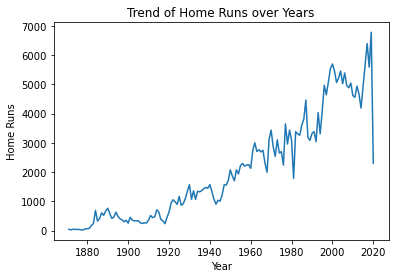

In [185]:
plt.plot(df2["yearID"], df2["HR"])
plt.xlabel('Year')
plt.ylabel('Home Runs')
plt.title("Trend of Home Runs over Years")
plt.show

### <span style='color:Blue'>Q3) Winning percentage;Add a winning percentage column (W/W+l) and Add a column that holds a 1 if the team won the world series and 0 if not (this will be used later on)</span>

### <span style='color:Blue'>Which team is the ovarall worst team/year in baseball history?(lowest winning pct) Which team is the ovarall best team/year in baseball history?(highest winning pct) Show the list of teams in ascending and descending order</span>

### <span style='color:Green'> A3) Both BL4 and WS4 have 0 value in winning percentage. However WS4 of 1872 can be called the overall worst team/year in baseball history because they have 0 wins against 11 losses which is worse compared to BL4.</span>  
### <span style='color:Green'> BS1 of 1875 is the overall best team/year in baseball history</span> 

In [186]:
df["Winning_Percentage"] = (df["W"]/(df["W"]+df["L"]))*100
df["Champ"] = np.where(df["WSWin"]=="Y",1,0)
df.head()

,yearID,lgID,teamID,franchID,Rank,G,Ghome,W,L,DivWin,...,SV,E,DP,FP,attendance,teamIDBR,teamIDlahman45,teamIDretro,Winning_Percentage,Champ
0,1871,NaN,BS1,BNA,3,31,NaN,20.0,10,NaN,...,3,243,24,0.834,NaN,BOS,BS1,BS1,66.666667,0
1,1871,NaN,CH1,CNA,2,28,NaN,19.0,9,NaN,...,1,229,16,0.829,NaN,CHI,CH1,CH1,67.857143,0
2,1871,NaN,CL1,CFC,8,29,NaN,10.0,19,NaN,...,0,234,15,0.818,NaN,CLE,CL1,CL1,34.482759,0
3,1871,NaN,FW1,KEK,7,19,NaN,7.0,12,NaN,...,0,163,8,0.803,NaN,KEK,FW1,FW1,36.842105,0
4,1871,NaN,NY2,NNA,5,33,NaN,16.0,17,NaN,...,0,235,14,0.840,NaN,NYU,NY2,NY2,48.484848,0


In [187]:
df_sort1 = df.sort_values('Winning_Percentage')
df_sort1

,yearID,lgID,teamID,franchID,Rank,G,Ghome,W,L,DivWin,...,SV,E,DP,FP,attendance,teamIDBR,teamIDlahman45,teamIDretro,Winning_Percentage,Champ
21,1873,NaN,BL4,MAR,9,6,NaN,0.0,6,NaN,...,0,74,0,0.761,NaN,MAR,BL4,BL4,0.000000,0
19,1872,NaN,WS4,NAT,11,11,NaN,0.0,11,NaN,...,0,120,2,0.774,NaN,NAT,WS4,WS4,0.000000,0
37,1875,NaN,BR2,BRA,11,44,NaN,2.0,42,NaN,...,0,432,20,0.801,NaN,BRA,BR2,BR2,4.545455,0
41,1875,NaN,KEO,WES,13,13,NaN,1.0,12,NaN,...,0,78,5,0.860,NaN,WES,KEO,KEO,7.692308,0
24,1873,NaN,ELI,RES,8,23,NaN,2.0,21,NaN,...,0,244,14,0.789,NaN,RES,ELI,ELI,8.695652,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1880,NL,CHN,CHC,1,86,NaN,67.0,17,NaN,...,3,329,41,0.913,NaN,CHC,CHN,CHN,79.761905,0
12,1872,NaN,BS1,BNA,1,48,NaN,39.0,8,NaN,...,4,280,44,0.875,NaN,BOS,BS1,BS1,82.978723,0
151,1884,UA,SLU,SLM,1,113,NaN,94.0,19,NaN,...,6,554,79,0.888,NaN,SLM,SLU,SLU,83.185841,0
38,1875,NaN,BS1,BNA,1,82,NaN,71.0,8,NaN,...,17,483,56,0.870,NaN,BOS,BS1,BS1,89.873418,0


In [188]:
df_sort2 = df.sort_values('Winning_Percentage', ascending = False)
df_sort2

,yearID,lgID,teamID,franchID,Rank,G,Ghome,W,L,DivWin,...,SV,E,DP,FP,attendance,teamIDBR,teamIDlahman45,teamIDretro,Winning_Percentage,Champ
38,1875,NaN,BS1,BNA,1,82,NaN,71.0,8,NaN,...,17,483,56,0.870,NaN,BOS,BS1,BS1,89.873418,0
151,1884,UA,SLU,SLM,1,113,NaN,94.0,19,NaN,...,6,554,79,0.888,NaN,SLM,SLU,SLU,83.185841,0
12,1872,NaN,BS1,BNA,1,48,NaN,39.0,8,NaN,...,4,280,44,0.875,NaN,BOS,BS1,BS1,82.978723,0
80,1880,NL,CHN,CHC,1,86,NaN,67.0,17,NaN,...,3,329,41,0.913,NaN,CHC,CHN,CHN,79.761905,0
51,1876,NL,CHN,CHC,1,66,NaN,52.0,14,NaN,...,4,282,33,0.899,NaN,CHC,CHN,CHN,78.787879,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,1875,NaN,KEO,WES,13,13,NaN,1.0,12,NaN,...,0,78,5,0.860,NaN,WES,KEO,KEO,7.692308,0
37,1875,NaN,BR2,BRA,11,44,NaN,2.0,42,NaN,...,0,432,20,0.801,NaN,BRA,BR2,BR2,4.545455,0
19,1872,NaN,WS4,NAT,11,11,NaN,0.0,11,NaN,...,0,120,2,0.774,NaN,NAT,WS4,WS4,0.000000,0
21,1873,NaN,BL4,MAR,9,6,NaN,0.0,6,NaN,...,0,74,0,0.761,NaN,MAR,BL4,BL4,0.000000,0


### <span style='color:Blue'>Q4) Correlation; Which features correlate to whether a team has won the world series or not. Pick the features that have the highest correlations with the binary champ column. Use a loop to determine this </span>

### <span style='color:Green'> A4) Features that have the highest correlaton percentage are Winning percentage, Win (W), Runs Scored(R), Walks by Batter(BB), Hits by batters(H) and attendance. (This is considering only the positive correlation) </span>  
### <span style='color:Green'> Features that have the highest correlaton percentage are Winning percentage, Rank, Win (W), Loss (L), Runs Scored(R), Earned Run Average(ERA), Run Average (RA). (This is considering both positive and negative correlations)</span>  

In [189]:
correlation = df.corr()
avg_corr = correlation["Champ"].mean()
correlation

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,ER,ERA,CG,SV,E,DP,FP,attendance,Winning_Percentage,Champ
yearID,1.000000,-0.308685,0.498659,0.113056,0.360229,0.365970,0.226781,0.494599,0.397625,0.632194,...,0.595344,0.386056,-0.885874,0.875589,-0.838654,0.578529,0.758710,0.768618,0.032385,0.001871
Rank,-0.308685,1.000000,-0.146309,-0.025908,-0.699927,0.495208,-0.420014,-0.170665,-0.266458,-0.351018,...,0.099692,0.295924,0.215904,-0.410778,0.321152,-0.128534,-0.298441,-0.459166,-0.832974,-0.268209
G,0.498659,-0.146309,1.000000,0.983996,0.694899,0.683093,0.581042,0.981870,0.883219,0.700384,...,0.718953,0.161475,-0.196971,0.514293,-0.418613,0.768087,0.783944,0.392307,0.106777,0.045549
Ghome,0.113056,-0.025908,0.983996,1.000000,0.487248,0.450204,0.506712,0.937535,0.744931,0.483765,...,0.474562,-0.000798,-0.103822,0.350310,0.013077,0.524598,0.152971,0.354750,0.022624,0.007907
W,0.360229,-0.699927,0.694899,0.487248,1.000000,-0.048215,0.700878,0.702650,0.738283,0.608174,...,0.267900,-0.216415,-0.108943,0.507288,-0.383226,0.520641,0.607191,0.424755,0.749610,0.246184
L,0.365970,0.495208,0.683093,0.450204,-0.048215,1.000000,0.093526,0.651605,0.476930,0.373543,...,0.741776,0.461782,-0.209388,0.235511,-0.228674,0.554690,0.489709,-0.012872,-0.615096,-0.187889
R,0.226781,-0.420014,0.581042,0.506712,0.700878,0.093526,1.000000,0.655170,0.818374,0.713008,...,0.576575,0.282076,-0.034161,0.315902,-0.100372,0.492944,0.377045,0.341865,0.481495,0.138097
AB,0.494599,-0.170665,0.981870,0.937535,0.702650,0.651605,0.655170,1.000000,0.922884,0.746314,...,0.747770,0.202431,-0.202990,0.514406,-0.397917,0.778792,0.759709,0.407247,0.140863,0.048586
H,0.397625,-0.266458,0.883219,0.744931,0.738283,0.476930,0.818374,0.922884,1.000000,0.817087,...,0.740390,0.266393,-0.143275,0.439494,-0.349892,0.742353,0.680634,0.328334,0.268840,0.086244
2B,0.632194,-0.351018,0.700384,0.483765,0.608174,0.373543,0.713008,0.746314,0.817087,1.000000,...,0.746932,0.407143,-0.469519,0.613023,-0.532301,0.668228,0.668609,0.563867,0.220879,0.063932


In [190]:
list1 = []
list2 = []
for index, row in correlation.iterrows():
    if index == "Champ":
        #print("Top features correlating to a teams world series win:")
        for i,v in row.items():
            if (v > avg_corr) & (i != "Champ"):
                #print(i," = ", v*100)
                list1.append(i)
                list2.append(v*100)
                data = {"Feature_Name": list1,
                       "Correlation_Percentage": list2}
                dfcorr = pd.DataFrame(data)
dfcorr.sort_values("Correlation_Percentage", ascending = False).head(6)

,Feature_Name,Correlation_Percentage
11,Winning_Percentage,27.232343
0,W,24.618396
1,R,13.809729
6,BB,9.470743
2,H,8.624382
10,attendance,7.271196


In [191]:
list1 = []
list2 = []
for index, row in correlation.iterrows():
    if index == "Champ":
        #print("Top features correlating to a teams world series win:")
        for i,v in row.items():
            if (abs(v) > avg_corr) & (i != "Champ"):
                #print(i," = ", v*100)
                list1.append(i)
                list2.append(abs(v)*100)
                data = {"Feature_Name": list1,
                       "Correlation_Percentage": list2}
                dfcorr = pd.DataFrame(data)
dfcorr.sort_values("Correlation_Percentage", ascending = False).head(11)

,Feature_Name,Correlation_Percentage
17,Winning_Percentage,27.232343
0,Rank,26.820862
1,W,24.618396
2,L,18.788861
3,R,13.809729
12,ERA,13.199037
10,RA,11.593108
8,BB,9.470743
4,H,8.624382
11,ER,7.318008


### <span style='color:Blue'>Q5) Overall trend of batting average; what is the overall trend in team batting average by year? Show a visualization and describe  the result in words</span> 

### <span style='color:Green'> A5) The batting average fluctuated over the years and but there seems to be a decrease in the average over the years as per the visualisations seen below. From 1880 to 1930 we see that the variance was high (mix max value difference was higher), however this seems to have come down after 1940. </span> 

In [192]:
df3 = df.groupby(["yearID"],as_index=False).agg({'H':'sum','AB':'sum'})
df3["Batting_Average"]=df3["H"]/df3["AB"]
df3

,yearID,H,AB,Batting_Average
0,1871,3101.0,10822,0.286546
1,1872,4467.0,15665,0.285158
2,1873,4926.0,16959,0.290465
3,1874,4633.0,19104,0.242515
4,1875,6812.0,26833,0.253867
...,...,...,...,...
145,2016,42276.0,165561,0.255350
146,2017,42215.0,165567,0.254972
147,2018,41018.0,165432,0.247945
148,2019,42039.0,166651,0.252258


<function matplotlib.pyplot.show(close=None, block=None)>

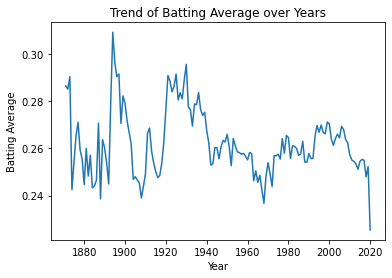

In [193]:
plt.plot(df3["yearID"], df3["Batting_Average"])
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title("Trend of Batting Average over Years")
plt.show

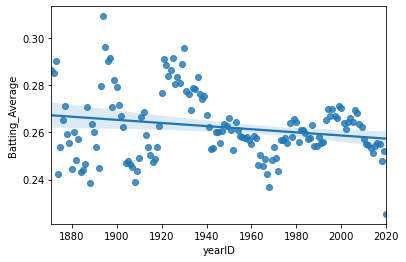

In [194]:
ax = sb.regplot(x="yearID", y="Batting_Average", data=df3)

### <span style='color:Blue'>Q6) Missing data; Pick 3 columns that have missing data.  Decide which of the three strategies to use and implement - a) delete the missing rows, b) delete the entire column, c) fill the columns with a value </span> 

In [195]:
df.columns = ['Year','LeagueID','TeamID','FranchiseID','Rank','Games_Played','Games_Played_At_Home','Wins','Losses','Division_Winner','Wild_Card_Winner','League_Champion','World_Series_Winner','Runs_Scored','At_Bats','Hits_By_Batters','Doubles','Triples','Homeruns_By_Batters','Walks_By_Batters','Strikeouts_By_Batters','Stolen_Bases','Caught_Stealing','BattersHit_By_Pitch','Sacrifice_Flies','Opponents_Runs_Scored','Earned_Runs_Allowed','Earned_Run_Average','Complete_Games','Saves','Errors','Double_Plays','Fielding_Percentage','Home_Attendance_Total','TeamID_BBReference_Website','TeamID_LahmanDBVersion','TeamID_Retrosheet','Winning_Percentage','Champ']
df

,Year,LeagueID,TeamID,FranchiseID,Rank,Games_Played,Games_Played_At_Home,Wins,Losses,Division_Winner,...,Saves,Errors,Double_Plays,Fielding_Percentage,Home_Attendance_Total,TeamID_BBReference_Website,TeamID_LahmanDBVersion,TeamID_Retrosheet,Winning_Percentage,Champ
0,1871,NaN,BS1,BNA,3,31,NaN,20.0,10,NaN,...,3,243,24,0.834,NaN,BOS,BS1,BS1,66.666667,0
1,1871,NaN,CH1,CNA,2,28,NaN,19.0,9,NaN,...,1,229,16,0.829,NaN,CHI,CH1,CH1,67.857143,0
2,1871,NaN,CL1,CFC,8,29,NaN,10.0,19,NaN,...,0,234,15,0.818,NaN,CLE,CL1,CL1,34.482759,0
3,1871,NaN,FW1,KEK,7,19,NaN,7.0,12,NaN,...,0,163,8,0.803,NaN,KEK,FW1,FW1,36.842105,0
4,1871,NaN,NY2,NNA,5,33,NaN,16.0,17,NaN,...,0,235,14,0.840,NaN,NYU,NY2,NY2,48.484848,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2020,NL,SLN,STL,3,58,27.0,30.0,28,N,...,13,33,46,0.983,0.0,STL,SLN,SLN,51.724138,0
2951,2020,AL,TBA,TBD,1,60,29.0,40.0,20,Y,...,23,33,52,0.985,0.0,TBR,TBA,TBA,66.666667,0
2952,2020,AL,TEX,TEX,5,60,30.0,22.0,38,N,...,10,40,40,0.981,0.0,TEX,TEX,TEX,36.666667,0
2953,2020,AL,TOR,TOR,3,60,26.0,32.0,28,N,...,17,38,47,0.982,0.0,TOR,TOR,TOR,53.333333,0


### <span style='color:Green'>a) delete the missing rows:</span> 
##### <span style='color:Green'> Column 'W' has one missing value at Row 81, which has missing value for team BSN in Year 1880. We can delete this row as this is one single row from 3000 rows that has missing data. Also, because it makes more sense to delete it rather than to fill some value in it. Furthermore, Fixing it using this methodology fixes the missing values in the Winning_Percentage column as well.</span> 

In [197]:
df = df.dropna(subset=['Wins'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2954 entries, 0 to 2954
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        2954 non-null   int64  
 1   LeagueID                    2904 non-null   object 
 2   TeamID                      2954 non-null   object 
 3   FranchiseID                 2954 non-null   object 
 4   Rank                        2954 non-null   int64  
 5   Games_Played                2954 non-null   int64  
 6   Games_Played_At_Home        2556 non-null   float64
 7   Wins                        2954 non-null   float64
 8   Losses                      2954 non-null   int64  
 9   Division_Winner             1410 non-null   object 
 10  Wild_Card_Winner            774 non-null    object 
 11  League_Champion             2926 non-null   object 
 12  World_Series_Winner         2598 non-null   object 
 13  Runs_Scored                 2954 

### <span style='color:Green'>b) delete the entire column:</span> 
##### <span style='color:Green'> Wild card winner column has the least number of values out of the total number. It is not recommended to fill any values in the missing spots, but the better approach would be to delete the column itself</span> 

In [198]:
df = df.drop(columns = ["Wild_Card_Winner"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2954 entries, 0 to 2954
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        2954 non-null   int64  
 1   LeagueID                    2904 non-null   object 
 2   TeamID                      2954 non-null   object 
 3   FranchiseID                 2954 non-null   object 
 4   Rank                        2954 non-null   int64  
 5   Games_Played                2954 non-null   int64  
 6   Games_Played_At_Home        2556 non-null   float64
 7   Wins                        2954 non-null   float64
 8   Losses                      2954 non-null   int64  
 9   Division_Winner             1410 non-null   object 
 10  League_Champion             2926 non-null   object 
 11  World_Series_Winner         2598 non-null   object 
 12  Runs_Scored                 2954 non-null   int64  
 13  At_Bats                     2954 

### <span style='color:Green'>c) fill the columns with a value:</span> 
##### <span style='color:Green'>The mean and median values are not very far apart hence, used the mean value here to fill na's with.</span> 

In [199]:
mean_val = df['Homeruns_By_Batters'].mean()
df['Homeruns_By_Batters'].fillna(mean_val, inplace=True)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2954 entries, 0 to 2954
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        2954 non-null   int64  
 1   LeagueID                    2904 non-null   object 
 2   TeamID                      2954 non-null   object 
 3   FranchiseID                 2954 non-null   object 
 4   Rank                        2954 non-null   int64  
 5   Games_Played                2954 non-null   int64  
 6   Games_Played_At_Home        2556 non-null   float64
 7   Wins                        2954 non-null   float64
 8   Losses                      2954 non-null   int64  
 9   Division_Winner             1410 non-null   object 
 10  League_Champion             2926 non-null   object 
 11  World_Series_Winner         2598 non-null   object 
 12  Runs_Scored                 2954 non-null   int64  
 13  At_Bats                     2954 

###  <span style='color:Blue'>Q7) Outliers; Determine 3 columns that have outliers and correct the situation</span> 

### <span style='color:Green'> a) Homeruns_By_Batters (With Outlier)</span>

<function matplotlib.pyplot.show(close=None, block=None)>

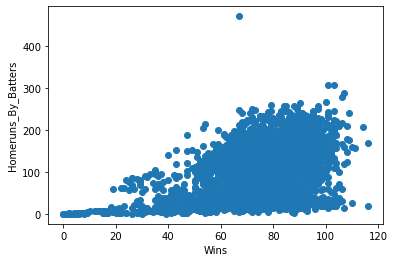

In [201]:
plt.scatter(df['Wins'], df['Homeruns_By_Batters'])
plt.xlabel('Wins')
plt.ylabel('Homeruns_By_Batters')
plt.show

In [202]:
idx = df[df["Homeruns_By_Batters"] == df['Homeruns_By_Batters'].max()].index.values
idx

array([2839], dtype=int64)

In [203]:
df.drop(idx,axis=0,inplace=True)

### <span style='color:Green'>a) Homeruns_By_Batters (Without Outlier)</span>

<function matplotlib.pyplot.show(close=None, block=None)>

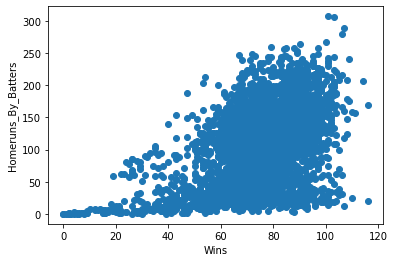

In [204]:
plt.scatter(df['Wins'], df['Homeruns_By_Batters'])
plt.xlabel('Wins')
plt.ylabel('Homeruns_By_Batters')
plt.show

### <span style='color:Green'>b) Earned_Run_Average (With Outlier)</span>

<function matplotlib.pyplot.show(close=None, block=None)>

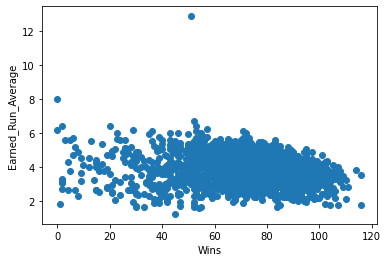

In [205]:
plt.scatter(df['Wins'], df['Earned_Run_Average'])
plt.xlabel('Wins')
plt.ylabel('Earned_Run_Average')
plt.show

In [206]:
idx2 = df[df["Earned_Run_Average"]==df["Earned_Run_Average"].max()].index.values
idx2

array([601], dtype=int64)

In [207]:
df.drop(idx2,axis=0,inplace=True)

In [208]:
idx2 = df[df["Earned_Run_Average"]==df["Earned_Run_Average"].max()].index.values
idx2

array([21], dtype=int64)

In [209]:
df.drop(idx2,axis=0,inplace=True)

### <span style='color:Green'>b) Earned_Run_Average (Without Outlier)</span>

<function matplotlib.pyplot.show(close=None, block=None)>

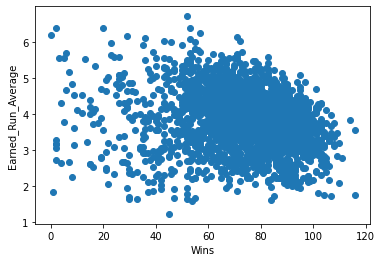

In [210]:
plt.scatter(df['Wins'], df['Earned_Run_Average'])
plt.xlabel('Wins')
plt.ylabel('Earned_Run_Average')
plt.show

### <span style='color:Green'> c) BattersHit_By_Pitch (With Outlier)</span>

<function matplotlib.pyplot.show(close=None, block=None)>

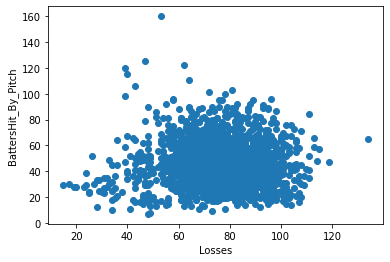

In [211]:
plt.scatter(df['Losses'], df['BattersHit_By_Pitch'])
plt.xlabel('Losses')
plt.ylabel('BattersHit_By_Pitch')
plt.show

In [212]:
idx3 = df[df["BattersHit_By_Pitch"] == df['BattersHit_By_Pitch'].max()].index.values
idx3

array([351], dtype=int64)

In [213]:
df.drop(idx3,axis=0,inplace=True)

### <span style='color:Green'> c) BattersHit_By_Pitch (Without Outlier) </span>

<function matplotlib.pyplot.show(close=None, block=None)>

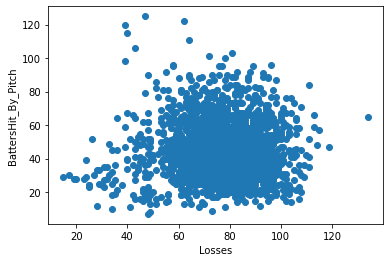

In [214]:
plt.scatter(df['Losses'], df['BattersHit_By_Pitch'])
plt.xlabel('Losses')
plt.ylabel('BattersHit_By_Pitch')
plt.show

### <span style='color:Green'> d) At_Bats (With Outlier) </span>

<function matplotlib.pyplot.show(close=None, block=None)>

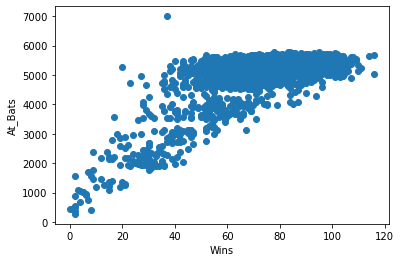

In [215]:
plt.scatter(df['Wins'], df['At_Bats'])
plt.xlabel('Wins')
plt.ylabel('At_Bats')
plt.show

In [216]:
idx4 = df[df["At_Bats"] == df['At_Bats'].max()].index.values
idx4

array([2947], dtype=int64)

In [217]:
df.drop(idx4,axis=0,inplace=True)

### <span style='color:Green'> d) At_Bats (Without Outlier)</span>

<function matplotlib.pyplot.show(close=None, block=None)>

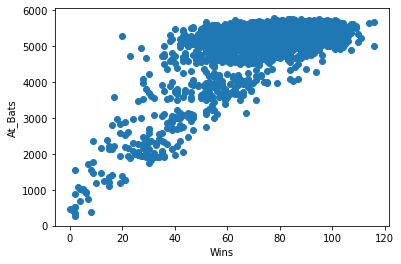

In [218]:
plt.scatter(df['Wins'], df['At_Bats'])
plt.xlabel('Wins')
plt.ylabel('At_Bats')
plt.show

###  <span style='color:Blue'>Q8) The baseball strike; In 1994, there was a baseball strike. Players and owners cancelled the season. Rumor has it that fans were angry and didn't go the ballpark for several years. Looking at trend from the attendance 10 years before and the strike, is this true?</span> 

In [219]:
df4 = df.groupby(["Year"],as_index=False)["Home_Attendance_Total"].sum()
df4

,Year,Home_Attendance_Total
0,1871,0.0
1,1872,0.0
2,1873,0.0
3,1874,0.0
4,1875,0.0
...,...,...
145,2016,73159044.0
146,2017,71040955.0
147,2018,69671272.0
148,2019,68494865.0


In [220]:
df_PreStrike = df4.loc[df4["Year"].between(1984, 1993)]
df_PreStrike

,Year,Home_Attendance_Total
113,1984,44742863.0
114,1985,46824379.0
115,1986,47506203.0
116,1987,52011506.0
117,1988,52998904.0
118,1989,55173096.0
119,1990,54823768.0
120,1991,56813760.0
121,1992,55870466.0
122,1993,70257938.0


In [221]:
df_PostStrike = df4.loc[df4["Year"].between(1994, 2003)]
df_PostStrike

,Year,Home_Attendance_Total
123,1994,50010016.0
124,1995,50469236.0
125,1996,60097381.0
126,1997,63168689.0
127,1998,70601147.0
128,1999,70139380.0
129,2000,71358907.0
130,2001,72581101.0
131,2002,67944389.0
132,2003,67630052.0


Text(0.5, 1.0, 'Attendance Total After Strike')

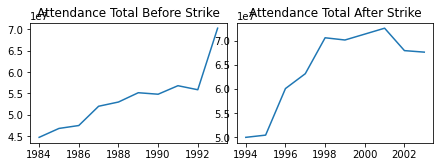

In [222]:
fig= plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.plot(df_PreStrike['Year'], df_PreStrike['Home_Attendance_Total'])
ax1.set_title('Attendance Total Before Strike')
ax2.plot(df_PostStrike['Year'], df_PostStrike['Home_Attendance_Total'])
ax2.set_title('Attendance Total After Strike')

<function matplotlib.pyplot.show(close=None, block=None)>

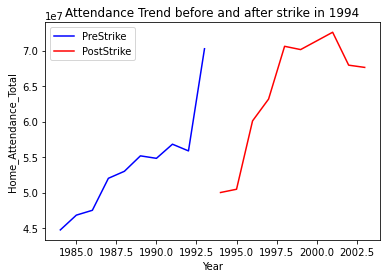

In [223]:
#adding a legend 
plt.plot(df_PreStrike['Year'], df_PreStrike['Home_Attendance_Total'], color = 'b', label='PreStrike')
plt.plot(df_PostStrike['Year'], df_PostStrike['Home_Attendance_Total'], color = 'r', label = 'PostStrike')

plt.title("Attendance Trend before and after strike in 1994")
plt.xlabel("Year")
plt.ylabel("Home_Attendance_Total")
plt.legend(loc = 'best')
plt.show

### <span style='color:Green'>A8) There seems to be a drop in the attendance value after 1994 (when the strike happened) when trends are compared between the two periods (1983 to 1993 - prestrike and 1994 to 2003 - poststrike). It seems to have taken a couple of years for the attendance value to go up similar to the prestrike era.</span>

###  <span style='color:Green'>Early vs Modern Era : Baseball has many different periods. To simplify, there is the "old era" that runs until 1920. After 1920 is considered the "modern era"</span>

###  <span style='color:Blue'> Q9) Analyze the two different periods. Are there any major statistical differnces? Use three different statistics to compare or contrast the two eras</span>

In [224]:
df_earlyEra = df.loc[df["Year"] <= 1920]
df_earlyEra.head()

df_modernEra = df.loc[df["Year"] > 1920]
df_modernEra

,Year,LeagueID,TeamID,FranchiseID,Rank,Games_Played,Games_Played_At_Home,Wins,Losses,Division_Winner,...,Saves,Errors,Double_Plays,Fielding_Percentage,Home_Attendance_Total,TeamID_BBReference_Website,TeamID_LahmanDBVersion,TeamID_Retrosheet,Winning_Percentage,Champ
719,1921,AL,BOS,BOS,5,154,77.0,75.0,79,NaN,...,5,157,151,0.975,279273.0,BOS,BOS,BOS,48.701299,0
720,1921,NL,BRO,LAD,5,152,78.0,77.0,75,NaN,...,12,232,142,0.964,613245.0,BRO,BRO,BRO,50.657895,0
721,1921,NL,BSN,ATL,4,153,74.0,79.0,74,NaN,...,12,199,122,0.969,318627.0,BSN,BSN,BSN,51.633987,0
722,1921,AL,CHA,CHW,7,154,77.0,62.0,92,NaN,...,9,199,155,0.969,543650.0,CHW,CHA,CHA,40.259740,0
723,1921,NL,CHN,CHC,7,153,76.0,64.0,89,NaN,...,7,166,129,0.974,410107.0,CHC,CHN,CHN,41.830065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2020,NL,SLN,STL,3,58,27.0,30.0,28,N,...,13,33,46,0.983,0.0,STL,SLN,SLN,51.724138,0
2951,2020,AL,TBA,TBD,1,60,29.0,40.0,20,Y,...,23,33,52,0.985,0.0,TBR,TBA,TBA,66.666667,0
2952,2020,AL,TEX,TEX,5,60,30.0,22.0,38,N,...,10,40,40,0.981,0.0,TEX,TEX,TEX,36.666667,0
2953,2020,AL,TOR,TOR,3,60,26.0,32.0,28,N,...,17,38,47,0.982,0.0,TOR,TOR,TOR,53.333333,0


### <span style='color:Green'>Stat1 - Homeruns_By_Batters</span>
##### <span style='color:Green'>Home runs by batters seem to be increasing over the years in the modern era when compared to the early era. We do not see the same kind of upward inclination in the early era. Additionally, we can see that the mean value of this baseball statistic in the two eras is significantly different. EarlyEra is 24 and ModerEra is 130, which is a whopping difference we observe.</span>

<function matplotlib.pyplot.show(close=None, block=None)>

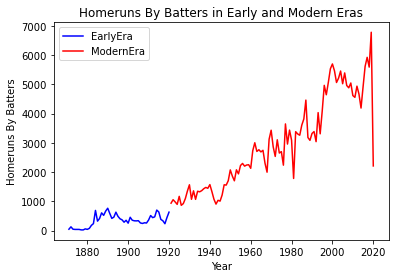

In [225]:
df_1 = df_earlyEra.groupby(["Year"],as_index=False)["Homeruns_By_Batters"].sum()
df_2 = df_modernEra.groupby(["Year"],as_index=False)["Homeruns_By_Batters"].sum()

plt.plot(df_1['Year'], df_1['Homeruns_By_Batters'], color = 'b', label='EarlyEra')
plt.plot(df_2['Year'], df_2['Homeruns_By_Batters'], color = 'r', label = 'ModernEra')

plt.title("Homeruns By Batters in Early and Modern Eras")
plt.xlabel("Year")
plt.ylabel("Homeruns By Batters")
plt.legend(loc = 'best')
plt.show

In [226]:
df_earlyEra["Homeruns_By_Batters"].mean()

24.063055941687843

In [227]:
df_modernEra["Homeruns_By_Batters"].mean()

130.98880931065352

### <span style='color:Green'> Stat2 - Strikeouts_By_Batters</span>
##### <span style='color:Green'>Strikeouts by batters seem to be increasing over the years in both modern and early eras. However, there is a significant increase in the average value of this statistic when they are compared against two eras. EarlyEra is 421 and ModerEra is 860, which is a considerable increase that we can observe.</span>

<function matplotlib.pyplot.show(close=None, block=None)>

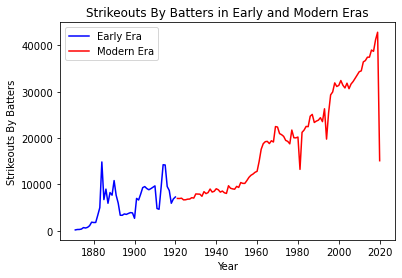

In [228]:
df_1 = df_earlyEra.groupby(["Year"],as_index=False)["Strikeouts_By_Batters"].sum()
df_2 = df_modernEra.groupby(["Year"],as_index=False)["Strikeouts_By_Batters"].sum()

plt.plot(df_1['Year'], df_1['Strikeouts_By_Batters'], color = 'b', label='Early Era')
plt.plot(df_2['Year'], df_2['Strikeouts_By_Batters'], color = 'r', label = 'Modern Era')

plt.title("Strikeouts By Batters in Early and Modern Eras")
plt.xlabel("Year")
plt.ylabel("Strikeouts By Batters")
plt.legend(loc = 'best')
plt.show

In [229]:
df_earlyEra["Strikeouts_By_Batters"].mean()

421.8724928366762

In [230]:
df_modernEra["Strikeouts_By_Batters"].mean()

860.677260519248

### <span style='color:Green'>Stat3 - Triples</span>
##### <span style='color:Green'>No of three base hits seem to have decreased in modern era in comparison to the early era. There is also a slight downward shift in the average value of this statistic when they are compared against the two eras. EarlyEra is 65 and ModerEra is 39, which is a decrease that we can observe.</span>

<function matplotlib.pyplot.show(close=None, block=None)>

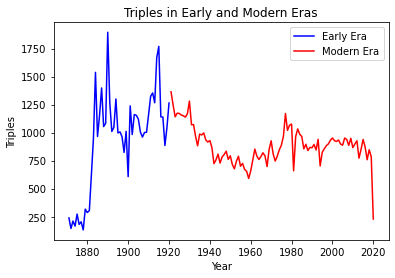

In [231]:
df_1 = df_earlyEra.groupby(["Year"],as_index=False)["Triples"].sum()
df_2 = df_modernEra.groupby(["Year"],as_index=False)["Triples"].sum()

plt.plot(df_1['Year'], df_1['Triples'], color = 'b', label='Early Era')
plt.plot(df_2['Year'], df_2['Triples'], color = 'r', label = 'Modern Era')

plt.title("Triples in Early and Modern Eras")
plt.xlabel("Year")
plt.ylabel("Triples")
plt.legend(loc = 'best')
plt.show

In [232]:
df_earlyEra["Triples"].mean()

65.53221288515407

In [233]:
df_modernEra["Triples"].mean()

39.66338406445837

###  <span style='color:Blue'> Q10) Run the dataset (with all the changes) through logistical regression. Use the binary "champ" columns as the predictor variable</span> 

### <span style='color:Green'>A10) The score percentage for the logistic regression is 95.9</span>

In [234]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [235]:
X = df

In [236]:
X = X.drop(['Champ'],axis=1)

In [237]:
y = df["Champ"]

In [238]:
lr = LogisticRegression()

In [239]:
#Dropping all the columns that have string values
X = X.drop(['LeagueID', 'TeamID', 'FranchiseID', 'Division_Winner', 'League_Champion' ,'World_Series_Winner','TeamID_BBReference_Website','TeamID_LahmanDBVersion','TeamID_Retrosheet'],axis=1)

In [240]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2949 entries, 0 to 2954
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   2949 non-null   int64  
 1   Rank                   2949 non-null   int64  
 2   Games_Played           2949 non-null   int64  
 3   Games_Played_At_Home   2553 non-null   float64
 4   Wins                   2949 non-null   float64
 5   Losses                 2949 non-null   int64  
 6   Runs_Scored            2949 non-null   int64  
 7   At_Bats                2949 non-null   int64  
 8   Hits_By_Batters        2948 non-null   float64
 9   Doubles                2949 non-null   int64  
 10  Triples                2948 non-null   float64
 11  Homeruns_By_Batters    2949 non-null   float64
 12  Walks_By_Batters       2949 non-null   float64
 13  Strikeouts_By_Batters  2932 non-null   float64
 14  Stolen_Bases           2825 non-null   float64
 15  Caug

In [241]:
#Handling null values - Dropping columns that have more than 50% NaN values 
X = X.drop(columns = ["BattersHit_By_Pitch","Sacrifice_Flies"])

In [242]:
#Handling null values - Filling all NA's with median values for columns that have NaN's upto 30% 
X["Games_Played_At_Home"].describe()
median_val = X['Games_Played_At_Home'].median()
X['Games_Played_At_Home'].fillna(median_val, inplace=True)

X["Hits_By_Batters"].describe()
median_val = X['Hits_By_Batters'].median()
X['Hits_By_Batters'].fillna(median_val, inplace=True)

X["Triples"].describe()
median_val = X['Triples'].median()
X['Triples'].fillna(median_val, inplace=True)

X["Strikeouts_By_Batters"].describe()
median_val = X['Strikeouts_By_Batters'].median()
X['Strikeouts_By_Batters'].fillna(median_val, inplace=True)

X["Stolen_Bases"].describe()
median_val = X['Stolen_Bases'].median()
X['Stolen_Bases'].fillna(median_val, inplace=True)

X["Caught_Stealing"].describe()
median_val = X['Caught_Stealing'].median()
X['Caught_Stealing'].fillna(median_val, inplace=True)

X["Home_Attendance_Total"].describe()
median_val = X['Home_Attendance_Total'].median()
X['Home_Attendance_Total'].fillna(median_val, inplace=True)

In [243]:
#Verifying that all the nulls are handled
X.isnull().sum()

Year                     0
Rank                     0
Games_Played             0
Games_Played_At_Home     0
Wins                     0
Losses                   0
Runs_Scored              0
At_Bats                  0
Hits_By_Batters          0
Doubles                  0
Triples                  0
Homeruns_By_Batters      0
Walks_By_Batters         0
Strikeouts_By_Batters    0
Stolen_Bases             0
Caught_Stealing          0
Opponents_Runs_Scored    0
Earned_Runs_Allowed      0
Earned_Run_Average       0
Complete_Games           0
Saves                    0
Errors                   0
Double_Plays             0
Fielding_Percentage      0
Home_Attendance_Total    0
Winning_Percentage       0
dtype: int64

In [244]:
lr.fit(X,y)

LogisticRegression()

In [245]:
lr.score(X,y)

0.9586300440827399